[<matplotlib.lines.Line2D object at 0x7f9302550160>, <matplotlib.lines.Line2D object at 0x7f93023569d0>, <matplotlib.lines.Line2D object at 0x7f9302266160>, <matplotlib.lines.Line2D object at 0x7f9358f0ddc0>]
['Auditory', 'Visual', 'Audiovisual', 'Race model']


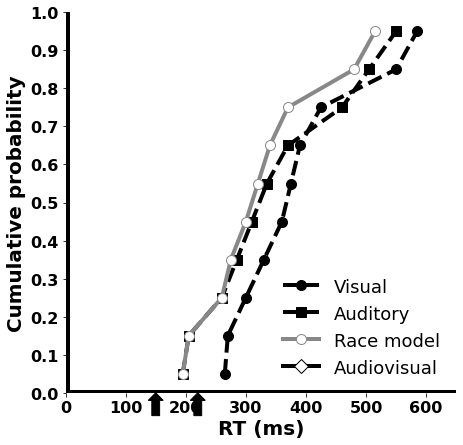

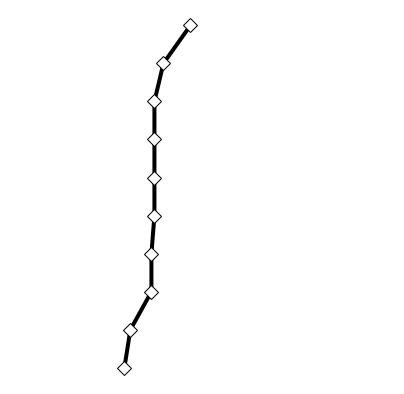

In [10]:
from src.nest.plots.generate import moving_average_plot_no_save
from src.nest.output.rates import calculate_response_times
import json
import matplotlib.pyplot as plt
import numpy as np

def cdf_calc(data):
    count, bins_count = np.histogram(data, bins=10)
    try:
        pdf = count / sum(count)
    except:
        pdf = 0
    cdf = np.cumsum(pdf)
    return bins_count, cdf

# ids = [407, 408, 409, 410, 411, 412, 413, 414, 415, 416]
# ids = [407, 410, 412, 413, 415, 416]
# ids = [407, 410, 412, 413, 415, 416, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454]
# ids = [460, 461, 462, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478]
# ids = [479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493]
ids = [479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518, 519, 520, 521, 522, 523]
th = 15
# plots = [
#     ['0', 'Auditory', '--s', '#f781bf', '#f781bf'],
#     ['1', 'Visual', '--o', '#377eb8', '#377eb8'],
#     ['2', 'Audiovisual', '-D', '#4daf4a', '#4daf4a']
# ]
plots = [
    ['0', 'Auditory', '--s', '#000', '#000'],
    ['1', 'Visual', '--o', '#000', '#000'],
    ['2', 'Audiovisual', '-D', '#000', '#fff']
]

# figure, axis = plt.subplots(2, 1, figsize=(10, 10))
# plt.setp(axis, xlim=(0, 600), ylim=(0, 1.1))
# axis[0].set_title('RTs')
# axis[1].set_title('Percentiles')

plt.figure(figsize=(7, 7))
plt.xlim(0, 650)
plt.ylim(0, 1)
plt.xlabel("RT (ms)", fontsize=20, weight="bold")
plt.ylabel("Cumulative probability", fontsize=20, weight="bold")
plt.axhline(linewidth=7, color='black')
plt.axvline(linewidth=7, color='black')
plt.xticks(fontsize=16, weight="bold")
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=16, weight="bold")

response_times = []
rates_a = []
rates_b = []
times_a = []
times_b = []
rts = []
for index, plot in enumerate(plots):
    response_times.append([])
    rts.append([])
    for id_index, id in enumerate(ids):
        rts[index].append([])
        with open('output/executions/'+str(id)+'/simulations/cerebellum_simple/1/bin_rates_DCN_a_test_'+plot[0]+'.json', 'r') as j:
                bin_rates = json.loads(j.read())

        ma_rates_a, times = moving_average_plot_no_save(bin_rates)

        with open('output/executions/'+str(id)+'/simulations/cerebellum_simple/1/bin_rates_DCN_b_test_'+plot[0]+'.json', 'r') as j:
                bin_rates = json.loads(j.read())
        ma_rates_b, times = moving_average_plot_no_save(bin_rates)

        ma_rates = [abs(a-b) for a, b in zip(ma_rates_a, ma_rates_b)]

        trial_time = 3000
        bin_size = 5
        resp = calculate_response_times(ma_rates, th, trial_time, bin_size)

        for rt in resp:
            rts[index][id_index].append(rt%1000)

    for id_index, id in enumerate(ids):
        response_times[index].extend(rts[index][id_index])

    bins_count, cdf = cdf_calc(response_times[index])

rt_final0 = [[], [], []]
rt_final = [[], [], []]
for i, r in enumerate(response_times[0]):
    if r < 900:
        rt_final0[0].append(r)
        rt_final0[1].append(response_times[1][i])
        rt_final0[2].append(response_times[2][i])
for i, r in enumerate(rt_final0[1]):
    if r < 900:
        rt_final[0].append(rt_final0[0][i])
        rt_final[1].append(r)
        rt_final[2].append(rt_final0[2][i])

for index, plot in enumerate(plots):
    perc = []
    for i in np.arange(0.05, 1.0, 0.1):
        perc.append(np.percentile(rt_final[index], i*100))

    # axis[0].plot(bins_count[1:], cdf, plot[2], label=plot[1], color=plot[3], markerfacecolor=plot[4])
    # axis[1].plot(perc, np.arange(0.05, 1.0, 0.1), plot[2], label=plot[1], color=plot[3], markerfacecolor=plot[4])
    if index != 2:
        plt.plot(perc, np.arange(0.05, 1.0, 0.1), plot[2], label=plot[1], color=plot[3], markerfacecolor=plot[4], markersize=10, linewidth=4)
    else:
        perc_av = perc
        plt.plot([10000], [1000], plot[2], label=plot[1], color=plot[3], markerfacecolor=plot[4], markersize=10, linewidth=4)
        

race_model = np.minimum.reduce([rt_final[0], rt_final[1]])

race_model = [v for v in race_model if v != 999999999]
bins_count, cdf = cdf_calc(race_model)

perc = []
for i in np.arange(0.05, 1.0, 0.1):
    perc.append(np.percentile(race_model, i*100))

# axis[0].plot(bins_count[1:], cdf, '-o', label='Race model', color="crimson", markerfacecolor="white")
# axis[1].plot(perc, np.arange(0.05, 1.0, 0.1), '-o', label='Race model', color="crimson", markerfacecolor="white")

plt.plot(perc, np.arange(0.05, 1.0, 0.1), '-o', label='Race model', color="#888", markerfacecolor="white", markersize=10, linewidth=4)

handles,labels = plt.gca().get_legend_handles_labels()
print(handles)
print(labels)
order = [1,0,3,2]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc="lower right", frameon=False, prop={'size': 18})

# plt.legend(loc="lower right", frameon=False, prop={'size': 18})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.arrow(150, -0.06, 0, 0.04, color="#000", width=13, head_width=25, head_length=0.02, clip_on=False)
plt.arrow(220, -0.06, 0, 0.04, color="#000", width=13, head_width=25, head_length=0.02, clip_on=False)
plt.savefig('cerebellum_rts.png', format='png', dpi=300)
plt.show()

plt.figure(figsize=(7, 7))
plt.xlim(0, 650)
plt.ylim(0, 1)
plot = plots[2]
plt.plot(perc_av, np.arange(0.05, 1.0, 0.1), plot[2], label=plot[1], color=plot[3], markerfacecolor=plot[4], markersize=10, linewidth=4)
plt.axis('off')
plt.savefig('cerebellum_rts_av.png', format='png', dpi=300)
plt.show()

[330, 345, 585, 330, 430, 390, 265, 370, 330, 330, 415, 525, 550, 265, 435, 390, 360, 540, 415, 320, 265, 350, 255, 565, 370, 335, 415, 380, 585, 345, 265, 345, 405, 525, 265, 525, 265, 585, 525, 530]
[260, 320, 275, 335, 275, 275, 350, 275, 335, 305, 510, 360, 400, 360, 455, 365, 360, 400, 360, 375, 395, 345, 340, 325, 335, 370, 330, 325, 370, 320, 410, 325, 310, 365, 325, 285, 310, 365, 310, 320]
[320, 430, 480, 430, 285, 505, 305, 290, 300, 235, 300, 480, 370, 240, 365, 320, 265, 430, 385, 295, 495, 280, 480, 320, 310, 480, 205, 525, 195, 515, 300, 335, 195, 340, 550, 505, 340, 345, 470, 610]
[225, 335, 305, 335, 315, 335, 275, 340, 315, 260, 215, 205, 220, 270, 290, 285, 205, 285, 290, 200, 240, 270, 315, 365, 340, 305, 310, 200, 340, 330, 300, 335, 235, 245, 240, 300, 240, 305, 215, 330]


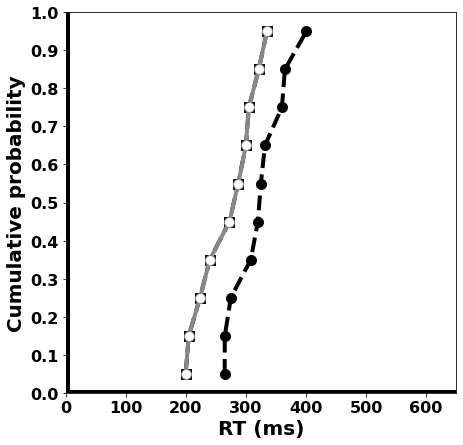

In [21]:
results = {
    "cerebellum": {
        "auditory": [430, 430, 430, 430, 430, 430, 430, 505, 260, 260, 260, 260, 260, 505, 505, 260, 505, 260, 505, 505, 260, 505, 285, 505, 505, 505, 505, 505, 285, 285, 505, 285, 505, 285, 285, 505, 285, 345, 260, 260, 260, 260, 260, 345, 345, 260, 345, 260, 345, 345, 260, 345, 610, 610, 610, 610, 610, 610, 610, 610, 610, 610, 610, 610, 610, 610, 610, 345, 345, 345, 345, 345, 345, 345, 345, 525, 525, 525, 525, 525, 525, 525, 525, 295, 230, 230, 230, 230, 230, 295, 295, 230, 295, 230, 295, 295, 230, 295, 275, 355, 355, 355, 355, 355, 275, 275, 355, 275, 355, 275, 275, 355, 275, 205, 240, 240, 240, 240, 240, 205, 205, 240, 205, 240, 205, 205, 240, 205, 495, 205, 205, 205, 205, 205, 495, 495, 205, 495, 205, 495, 495, 205, 495, 260, 260, 260, 260, 260, 260, 260, 260, 480, 480, 480, 480, 480, 480, 480, 480, 430, 290, 290, 290, 290, 290, 430, 430, 290, 430, 290, 430, 430, 290, 430, 305, 195, 195, 195, 195, 195, 305, 305, 195, 305, 195, 305, 305, 195, 305, 195, 300, 300, 300, 300, 300, 195, 195, 300, 195, 300, 195, 195, 300, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 480, 300, 300, 300, 300, 300, 480, 480, 300, 480, 300, 480, 480, 300, 480, 480, 485, 485, 485, 485, 485, 480, 480, 485, 480, 485, 480, 480, 485, 480, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 340, 215, 215, 215, 215, 215, 340, 340, 215, 340, 215, 340, 340, 215, 340, 455, 335, 335, 335, 335, 335, 455, 455, 335, 455, 335, 455, 455, 335, 455, 335, 610, 610, 610, 610, 610, 335, 335, 610, 335, 610, 335, 335, 610, 335, 460, 460, 460, 460, 460, 460, 460, 430, 310, 310, 310, 310, 310, 430, 430, 310, 430, 310, 430, 430, 310, 430, 235, 320, 320, 320, 320, 320, 235, 235, 320, 235, 320, 235, 235, 320, 235, 310, 275, 275, 275, 275, 275, 310, 310, 275, 310, 275, 310, 310, 275, 310, 365, 445, 445, 445, 445, 445, 365, 365, 445, 365, 445, 365, 365, 445, 365, 370, 265, 265, 265, 265, 265, 370, 370, 265, 370, 265, 370, 370, 265, 370, 310, 240, 240, 240, 240, 240, 310, 310, 240, 310, 240, 310, 310, 240, 310, 290, 290, 290, 290, 290, 290, 290, 320, 320, 320, 320, 320, 320, 320, 320, 225, 225, 225, 225, 225, 225, 225, 225, 205, 205, 205, 205, 205, 205, 205, 300, 205, 205, 205, 205, 205, 300, 300, 205, 300, 205, 300, 300, 205, 300, 280, 385, 385, 385, 385, 385, 280, 280, 385, 280, 385, 280, 280, 385, 280, 550, 485, 485, 485, 485, 485, 550, 550, 485, 550, 485, 550, 550, 485, 550, 470, 470, 470, 470, 470, 470, 470, 525, 185, 185, 185, 185, 185, 525, 525, 185, 525, 185, 525, 525, 185, 525],
        "visual": [320, 320, 320, 320, 320, 320, 320, 575, 330, 330, 330, 330, 330, 575, 575, 330, 575, 330, 575, 575, 330, 575, 335, 575, 575, 575, 575, 575, 335, 335, 575, 335, 575, 335, 335, 575, 335, 415, 330, 330, 330, 330, 330, 415, 415, 330, 415, 330, 415, 415, 330, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 595, 595, 595, 595, 595, 595, 595, 595, 365, 300, 300, 300, 300, 300, 365, 365, 300, 365, 300, 365, 365, 300, 365, 345, 430, 430, 430, 430, 430, 345, 345, 430, 345, 430, 345, 345, 430, 345, 280, 310, 310, 310, 310, 310, 280, 280, 310, 280, 310, 280, 280, 310, 280, 565, 275, 275, 275, 275, 275, 565, 565, 275, 565, 275, 565, 565, 275, 565, 330, 330, 330, 330, 330, 330, 330, 330, 550, 550, 550, 550, 550, 550, 550, 550, 265, 360, 360, 360, 360, 360, 265, 265, 360, 265, 360, 265, 265, 360, 265, 370, 265, 265, 265, 265, 265, 370, 370, 265, 370, 265, 370, 370, 265, 370, 265, 370, 370, 370, 370, 370, 265, 265, 370, 265, 370, 265, 265, 370, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 390, 375, 370, 370, 370, 370, 370, 375, 375, 370, 375, 370, 375, 375, 370, 375, 550, 585, 585, 585, 585, 585, 550, 550, 585, 550, 585, 550, 550, 585, 550, 590, 590, 590, 590, 590, 590, 590, 590, 585, 585, 585, 585, 585, 585, 585, 585, 585, 585, 585, 585, 585, 585, 585, 410, 285, 285, 285, 285, 285, 410, 410, 285, 410, 285, 410, 410, 285, 410, 525, 405, 405, 405, 405, 405, 525, 525, 405, 525, 405, 525, 525, 405, 525, 345, 530, 530, 530, 530, 530, 345, 345, 530, 345, 530, 345, 345, 530, 345, 345, 345, 345, 345, 345, 345, 345, 295, 380, 380, 380, 380, 380, 295, 295, 380, 295, 380, 295, 295, 380, 295, 305, 390, 390, 390, 390, 390, 305, 305, 390, 305, 390, 305, 305, 390, 305, 380, 345, 345, 345, 345, 345, 380, 380, 345, 380, 345, 380, 380, 345, 380, 435, 515, 515, 515, 515, 515, 435, 435, 515, 435, 515, 435, 435, 515, 435, 425, 335, 335, 335, 335, 335, 425, 425, 335, 425, 335, 425, 425, 335, 425, 380, 310, 310, 310, 310, 310, 380, 380, 310, 380, 310, 380, 380, 310, 380, 360, 360, 360, 360, 360, 360, 360, 390, 390, 390, 390, 390, 390, 390, 390, 260, 260, 260, 260, 260, 260, 260, 260, 275, 275, 275, 275, 275, 275, 275, 525, 275, 275, 275, 275, 275, 525, 525, 275, 525, 275, 525, 525, 275, 525, 350, 265, 265, 265, 265, 265, 350, 350, 265, 350, 265, 350, 350, 265, 350, 370, 270, 270, 270, 270, 270, 370, 370, 270, 370, 270, 370, 370, 270, 370, 540, 540, 540, 540, 540, 540, 540, 595, 255, 255, 255, 255, 255, 595, 595, 255, 595, 255, 595, 595, 255, 595],
        "audiovisual": [240, 240, 240, 240, 240, 240, 240, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 240, 245, 245, 245, 245, 245, 240, 240, 245, 240, 245, 240, 240, 245, 240, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 240, 230, 230, 230, 230, 230, 240, 240, 230, 240, 230, 240, 240, 230, 240, 245, 240, 240, 240, 240, 240, 245, 245, 240, 245, 240, 245, 245, 240, 245, 205, 240, 240, 240, 240, 240, 205, 205, 240, 205, 240, 205, 205, 240, 205, 245, 205, 205, 205, 205, 205, 245, 245, 205, 245, 205, 245, 245, 205, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 240, 245, 245, 245, 245, 245, 240, 240, 245, 240, 245, 240, 240, 245, 240, 245, 195, 195, 195, 195, 195, 245, 245, 195, 245, 195, 245, 245, 195, 245, 195, 245, 245, 245, 245, 245, 195, 195, 245, 195, 245, 195, 195, 245, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 300, 300, 300, 300, 300, 245, 245, 300, 245, 300, 245, 245, 300, 245, 350, 245, 245, 245, 245, 245, 350, 350, 245, 350, 245, 350, 350, 245, 350, 240, 240, 240, 240, 240, 240, 240, 240, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 265, 215, 215, 215, 215, 215, 265, 265, 215, 265, 215, 265, 265, 215, 265, 385, 260, 260, 260, 260, 260, 385, 385, 260, 385, 260, 385, 385, 260, 385, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 245, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 235, 260, 260, 260, 260, 260, 235, 235, 260, 235, 260, 235, 235, 260, 235, 250, 245, 245, 245, 245, 245, 250, 250, 245, 250, 245, 250, 250, 245, 250, 305, 245, 245, 245, 245, 245, 305, 305, 245, 305, 245, 305, 305, 245, 305, 240, 245, 245, 245, 245, 245, 240, 240, 245, 240, 245, 240, 240, 245, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 240, 245, 245, 245, 245, 245, 245, 245, 240, 240, 240, 240, 240, 240, 240, 240, 225, 225, 225, 225, 225, 225, 225, 225, 205, 205, 205, 205, 205, 205, 205, 240, 205, 205, 205, 205, 205, 240, 240, 205, 240, 205, 240, 240, 205, 240, 295, 305, 305, 305, 305, 305, 295, 295, 305, 295, 305, 295, 295, 305, 295, 240, 250, 250, 250, 250, 250, 240, 240, 250, 240, 250, 240, 240, 250, 240, 245, 245, 245, 245, 245, 245, 245, 245, 185, 185, 185, 185, 185, 245, 245, 185, 245, 185, 245, 245, 185, 245],
        "race_model": [320, 320, 320, 320, 320, 320, 320, 505, 260, 260, 260, 260, 260, 505, 505, 260, 505, 260, 505, 505, 260, 505, 285, 505, 505, 505, 505, 505, 285, 285, 505, 285, 505, 285, 285, 505, 285, 345, 260, 260, 260, 260, 260, 345, 345, 260, 345, 260, 345, 345, 260, 345, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 415, 345, 345, 345, 345, 345, 345, 345, 345, 525, 525, 525, 525, 525, 525, 525, 525, 295, 230, 230, 230, 230, 230, 295, 295, 230, 295, 230, 295, 295, 230, 295, 275, 355, 355, 355, 355, 355, 275, 275, 355, 275, 355, 275, 275, 355, 275, 205, 240, 240, 240, 240, 240, 205, 205, 240, 205, 240, 205, 205, 240, 205, 495, 205, 205, 205, 205, 205, 495, 495, 205, 495, 205, 495, 495, 205, 495, 260, 260, 260, 260, 260, 260, 260, 260, 480, 480, 480, 480, 480, 480, 480, 480, 265, 290, 290, 290, 290, 290, 265, 265, 290, 265, 290, 265, 265, 290, 265, 305, 195, 195, 195, 195, 195, 305, 305, 195, 305, 195, 305, 305, 195, 305, 195, 300, 300, 300, 300, 300, 195, 195, 300, 195, 300, 195, 195, 300, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 195, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 320, 375, 300, 300, 300, 300, 300, 375, 375, 300, 375, 300, 375, 375, 300, 375, 480, 485, 485, 485, 485, 485, 480, 480, 485, 480, 485, 480, 480, 485, 480, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 515, 340, 215, 215, 215, 215, 215, 340, 340, 215, 340, 215, 340, 340, 215, 340, 455, 335, 335, 335, 335, 335, 455, 455, 335, 455, 335, 455, 455, 335, 455, 335, 530, 530, 530, 530, 530, 335, 335, 530, 335, 530, 335, 335, 530, 335, 345, 345, 345, 345, 345, 345, 345, 295, 310, 310, 310, 310, 310, 295, 295, 310, 295, 310, 295, 295, 310, 295, 235, 320, 320, 320, 320, 320, 235, 235, 320, 235, 320, 235, 235, 320, 235, 310, 275, 275, 275, 275, 275, 310, 310, 275, 310, 275, 310, 310, 275, 310, 365, 445, 445, 445, 445, 445, 365, 365, 445, 365, 445, 365, 365, 445, 365, 370, 265, 265, 265, 265, 265, 370, 370, 265, 370, 265, 370, 370, 265, 370, 310, 240, 240, 240, 240, 240, 310, 310, 240, 310, 240, 310, 310, 240, 310, 290, 290, 290, 290, 290, 290, 290, 320, 320, 320, 320, 320, 320, 320, 320, 225, 225, 225, 225, 225, 225, 225, 225, 205, 205, 205, 205, 205, 205, 205, 300, 205, 205, 205, 205, 205, 300, 300, 205, 300, 205, 300, 300, 205, 300, 280, 265, 265, 265, 265, 265, 280, 280, 265, 280, 265, 280, 280, 265, 280, 370, 270, 270, 270, 270, 270, 370, 370, 270, 370, 270, 370, 370, 270, 370, 470, 470, 470, 470, 470, 470, 470, 525, 185, 185, 185, 185, 185, 525, 525, 185, 525, 185, 525, 525, 185, 525]
    },
    "cortex": {
        "auditory": [225, 335, 305, 335, 315, 335, 275, 340, 315, 260, 215, 205, 220, 270, 290, 285, 205, 285, 290, 200, 240, 270, 315, 365, 340, 305, 310, 200, 340, 330, 300, 335, 235, 245, 240, 300, 240, 305, 215, 330],
        "visual": [260, 320, 275, 335, 275, 275, 350, 275, 335, 305, 510, 360, 400, 360, 455, 365, 360, 400, 360, 375, 395, 345, 340, 325, 335, 370, 330, 325, 370, 320, 410, 325, 310, 365, 325, 285, 310, 365, 310, 320],
        "race_model": [225, 320, 275, 335, 275, 275, 275, 275, 315, 260, 215, 205, 220, 270, 290, 285, 205, 285, 290, 200, 240, 270, 315, 325, 335, 305, 310, 200, 340, 320, 300, 325, 235, 245, 240, 285, 240, 305, 215, 320]
    }
}
# a = [225, 335, 999999999, 305, 999999999, 335, 999999999, 999999999, 315, 999999999, 335, 999999999, 275, 340, 999999999, 315, 999999999, 999999999, 260, 999999999, 999999999, 999999999, 215, 999999999, 205, 999999999, 220, 270, 999999999, 290, 999999999, 285, 999999999, 999999999, 205, 999999999, 285, 290, 999999999, 200, 240, 270, 999999999, 315, 999999999, 365, 999999999, 999999999, 340, 999999999, 305, 999999999, 310, 200, 999999999, 340, 999999999, 999999999, 330, 999999999, 999999999, 999999999, 300, 999999999, 335, 999999999, 235, 245, 999999999, 240, 999999999, 300, 999999999, 999999999, 240, 999999999, 305, 215, 999999999, 330]
# b = [value for value in a if value != 999999999]
# print(b)
# a =[260, 320, 999999999, 275, 999999999, 335, 999999999, 999999999, 275, 999999999, 275, 999999999, 350, 275, 999999999, 335, 999999999, 999999999, 305, 999999999, 999999999, 999999999, 510, 999999999, 360, 999999999, 400, 360, 999999999, 455, 999999999, 365, 999999999, 999999999, 360, 999999999, 400, 360, 999999999, 375, 395, 345, 999999999, 340, 999999999, 325, 999999999, 999999999, 335, 999999999, 370, 999999999, 330, 325, 999999999, 370, 999999999, 999999999, 320, 999999999, 999999999, 999999999, 410, 999999999, 325, 999999999, 310, 365, 999999999, 325, 999999999, 285, 999999999, 999999999, 310, 999999999, 365, 310, 999999999, 320]
# b = [value for value in a if value != 999999999]
# print(b)
['0', 'Auditory', '--s', '#000', '#000'],
['1', 'Visual', '--o', '#000', '#000'],
['2', 'Audiovisual', '-D', '#000', '#fff']
import random
import matplotlib.pyplot as plt
import numpy as np
visual_cereb = random.sample(results['cerebellum']['visual'], 40)
visual_cortex = results['cortex']['visual']
auditory_cereb = random.sample(results['cerebellum']['auditory'], 40)
auditory_cortex = results['cortex']['auditory']

auditory_cereb = random.sample(results['cerebellum']['auditory'], 40)

print(visual_cereb)
print(visual_cortex)
print(auditory_cereb)
print(auditory_cortex)

plt.figure(figsize=(7, 7))
plt.xlim(0, 650)
plt.ylim(0, 1)
plt.xlabel("RT (ms)", fontsize=20, weight="bold")
plt.ylabel("Cumulative probability", fontsize=20, weight="bold")
plt.axhline(linewidth=7, color='black')
plt.axvline(linewidth=7, color='black')
plt.xticks(fontsize=16, weight="bold")
plt.yticks(np.arange(0, 1.1, 0.1), fontsize=16, weight="bold")

visual = np.minimum.reduce([visual_cortex, visual_cereb])
perc_visual = []
for i in np.arange(0.05, 1.0, 0.1):
    perc_visual.append(np.percentile(visual, i*100))
plt.plot(perc_visual, np.arange(0.05, 1.0, 0.1), '--o', label='Visual', color='#000', markerfacecolor='#000', markersize=10, linewidth=4)

auditory = np.minimum.reduce([auditory_cortex, auditory_cereb])
perc_auditory = []
for i in np.arange(0.05, 1.0, 0.1):
    perc_auditory.append(np.percentile(auditory, i*100))
plt.plot(perc_auditory, np.arange(0.05, 1.0, 0.1), '--s', label='Auditory', color='#000', markerfacecolor='#000', markersize=10, linewidth=4)

race_model = np.minimum.reduce([auditory, visual])
perc_race_model = []
for i in np.arange(0.05, 1.0, 0.1):
    perc_race_model.append(np.percentile(auditory, i*100))
plt.plot(perc_race_model, np.arange(0.05, 1.0, 0.1), '-o', label='Race model', color="#888", markerfacecolor="white", markersize=10, linewidth=4)

plt.show()